This Python program illustrate that a confidence interval with significance level $1 - \alpha = 95\%$  covers the true value of the parameter with probability $95\%$.

This program generates 100 confidence intervals around sample mean estimates. The confidence intervals that include the true parameter are shown in blue, while those that do not are gray. The point estimates are marked with red circles, and the true parameter is indicated by a purple dashed line.

Z-value for alpha=0.1: 1.6448536269514722
Number of times the confidence interval did not cover the true value: 12


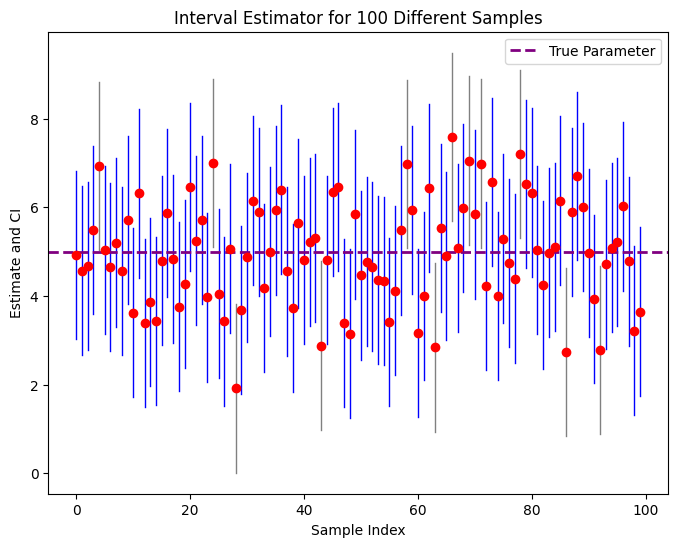

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n_samples = 100  # Number of samples
sample_size = 3  # Size of each sample
true_theta = 5    # True parameter value
sigma = 2         # Standard deviation of the sample observation.

alpha = 0.10     # Significance level

# Calculate z for arbitrary alpha (norm.ppf stands for Percent Point Function,
# which is the inverse of the cumulative distribution function (CDF) for a normal distribution.)

z_value = norm.ppf(1 - alpha / 2)
print(f"Z-value for alpha={alpha}: {z_value}")

# Generate sample means and confidence intervals
#np.random.seed(42)  # For reproducibility
samples = np.random.normal(loc=true_theta, scale=sigma, size=(n_samples, sample_size))
theta_hats = samples.mean(axis=1)
se_theta_hat = sigma / np.sqrt(sample_size)  # Standard error of the estimator


# Compute confidence intervals
lower_bounds = theta_hats - z_value * se_theta_hat
upper_bounds = theta_hats + z_value * se_theta_hat

# Count how many times the confidence interval does not cover the true value
missed_count = np.sum((lower_bounds > true_theta) | (upper_bounds < true_theta))
print(f"Number of times the confidence interval did not cover the true value: {missed_count}")

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_samples):
    color = 'blue' if lower_bounds[i] <= true_theta <= upper_bounds[i] else 'gray'
    plt.plot([i, i], [lower_bounds[i], upper_bounds[i]], color=color, lw=1)
    plt.scatter(i, theta_hats[i], color='red', zorder=3)

# True parameter line
plt.axhline(y=true_theta, color='purple', linestyle='--', linewidth=2, label='True Parameter')

plt.xlabel("Sample Index")
plt.ylabel("Estimate and CI")
plt.title("Interval Estimator for 100 Different Samples")
plt.legend()
plt.show()
